# 1. Determining the end goal
## Prediciting NVIDIA's opening stock price over the next 6 months.

# 2. Data Manipulation

In [45]:
# install required packages
!pip3 install pandas numpy matplotlib seaborn scikit-learn tensorflow yfinance


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [46]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import yfinance as yf
import os

In [47]:
path = os.getcwd()
print(f"The current working directory is: {path}")

# download the data
data = yf.download('NVDA', start='2010-01-01', end='2025-01-31')
data.to_csv('NVDA.csv')
data = pd.read_csv('NVDA.csv')

# Drop the first two rows and rename the columns
data.drop([0, 1], axis=0, inplace=True)
data.rename(columns={'Price': 'Date'}, inplace=True)
data.head()
data.to_csv('NVDA_data.csv', index=False)

The current working directory is: /Users/redabaki/Desktop/AI Engineering/NVIDIA


[*********************100%***********************]  1 of 1 completed


In [48]:
# Load the data
data1 = pd.read_csv('NVDA_data.csv')
#cols = ['Close', 'High', 'Low', 'Open', 'Volume']
#data1 = data1[cols].replace('[\$,]', '', regex=True).astype(float)
data1['Date'] = pd.to_datetime(data1['Date'])
data1.to_csv('NVDA_data_final.csv', index=False)
data2 = pd.read_csv('NVDA_data_final.csv')

# Delete the previous CSV file
os.remove('NVDA.csv')
os.remove('NVDA_data.csv')

#print(data2.head())
#print(data2.info())

# 3. Data Analysis

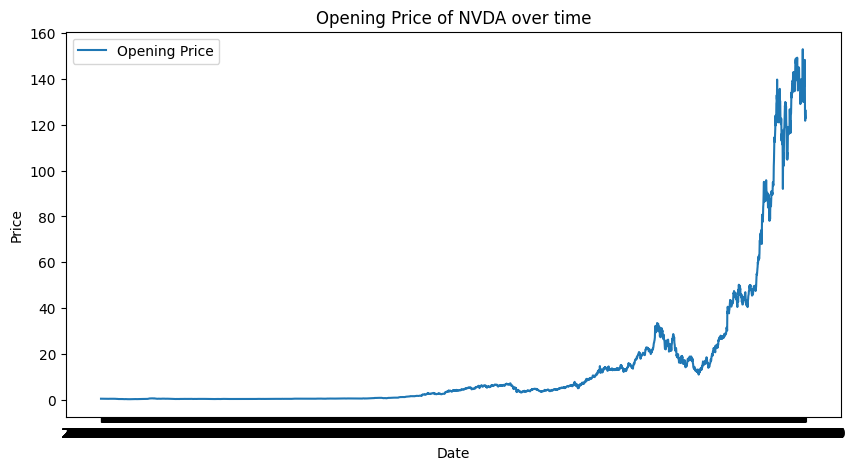

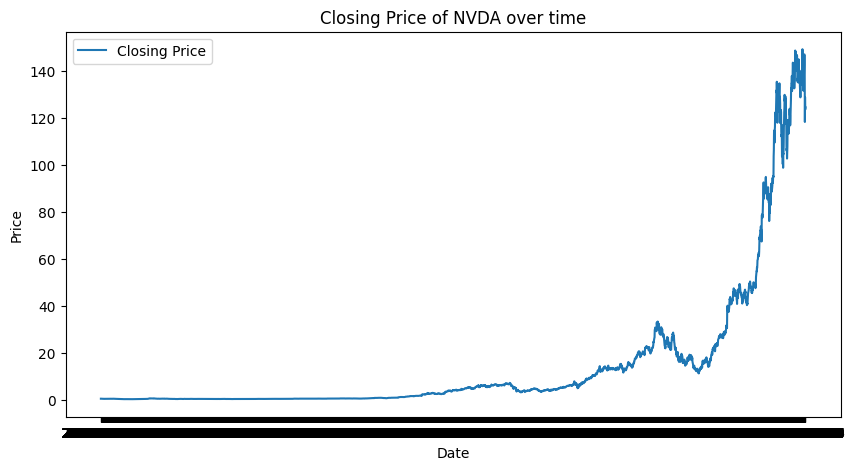

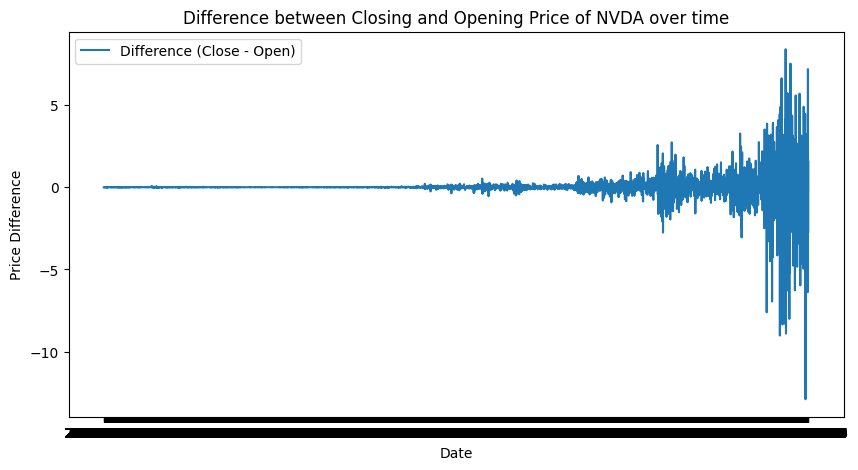

In [49]:
plt.figure(figsize=(10,5))
plt.plot(data2['Date'], data2['Open'], label='Opening Price')
plt.title('Opening Price of NVDA over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data2['Date'], data2['Close'], label='Closing Price')
plt.title('Closing Price of NVDA over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
#plt.plot(data2['Date'], data2['High'], label='High Price')
plt.plot(data2['Date'], data2['Close'] - data2['Open'], label='Difference (Close - Open)')
plt.title('Difference between Closing and Opening Price of NVDA over time')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()


### 1. Opening and Closing Prices Over Time
#### Opening Price Graph:

##### The opening price chart shows a general upward trend in NVDA's stock price from 2019 onwards. There is a noticeable increase particularly from mid-2020, with the price rising sharply.
##### The sharp increase suggests significant investor confidence and possibly reflects the impact of broader market conditions or company-specific news.

#### Closing Price Graph:

##### Similar to the opening price, the closing price also shows a steep upward trajectory starting around the same time. This reaffirms the strength of the stock's performance.
##### The closing price often tracks higher than the opening price, which might indicate strong buying pressure during the trading day.

### 2. Difference Between Closing and Opening Prices
#### Difference Graph (Close - Open):

##### This graph shows the daily price difference between the closing and opening prices. Positive values indicate days where the stock closed higher than it opened, while negative values suggest a close lower than the opening price.
##### Initially, the differences are relatively small and fluctuate around zero, indicating a balanced dynamic between buyers and sellers.
##### Over time, particularly alongside the steep price increase, the variability in daily differences also increases. This increase in volatility could indicate more speculative trading or increased investor attention on the stock.
##### The spikes in the graph, both positive and negative, are notable and could be aligned with specific events or news affecting the company or its sector.
##### How These Insights Can Help in Building a Predictor Model

#### Trend Analysis:
##### Recognizing the overall upward trend in both opening and closing prices could be used to set up trend-following strategies in the predictive model.
##### Trend-based features, such as moving averages or exponential smoothing, can be created to capture this trend over time for prediction purposes.

#### Volatility Analysis:
##### The difference graph provides insights into the stock's daily volatility. Incorporating measures of volatility, such as the standard deviation of the differences over a moving window, could improve the model’s ability to predict price movements under different market conditions.

#### Event-Driven Spikes:
##### The presence of spikes in the difference graph suggests sensitivity to news or market events. Incorporating news sentiment analysis or indicators of market events could enhance the predictive accuracy for days with unusual market activity.

#### Feature Engineering:
##### Features capturing daily price changes (such as the difference between opening and closing prices) can be directly used as inputs to the model to help predict the next day's price movement or to forecast whether the closing price will be higher or lower than the opening.

##### In conclusion, the analysis of NVDIA's stock performance through visualizations of its opening, closing, and day-end price differences over time reveals several key insights that can be instrumental for predictive modeling:

##### Persistent Trending Behavior: Both the opening and closing price charts display a strong upward trend beginning around mid-2020, underscoring a period of significant growth. This trend highlights the importance of incorporating long-term price movement indicators in the predictive model to leverage this upward momentum.

##### Increased Volatility: The graph of the daily differences between the opening and closing prices shows increased volatility concurrent with the stock's sharp rise. This suggests that the stock's behavior is influenced by external factors and market sentiments, which should be considered when developing predictive algorithms. Features like rolling standard deviations of price changes or volatility indexes could be beneficial in capturing this aspect.

##### Opportunities for Short-Term Predictions: The variability in the day-end price differences presents opportunities for short-term trading strategies. Predictive models that focus on intra-day price movements could be particularly useful, especially for algorithmic trading platforms.

##### Refinement through Feature Engineering: The detailed examination of how prices close relative to their opening can aid in crafting more precise features for the model, such as those capturing intra-day highs and lows, which could provide additional predictive power.

##### Integration of External Data: Finally, the sensitivity of the stock to external events, as suggested by the spikes in price differences, underscores the potential benefit of integrating external data sources such as economic indicators, market news sentiment, or even global events into the predictive framework.

# 4. Splitting the data
## 80% training 20% testing

In [50]:
clean_data = data2.dropna()

# Convert 'Date' column to datetime format
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

split_index = pd.Timestamp('2024-01-01')
train_data = clean_data[clean_data['Date'] < split_index]
test_data = clean_data[clean_data['Date'] >= split_index]

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (3522, 6)
Test data shape: (271, 6)


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Prepare the data
X_train = train_data[['Close', 'High', 'Low', 'Volume']]
y_train = train_data['Open']
X_test = test_data[['Close', 'High', 'Low', 'Volume']]
y_test = test_data['Open']

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

# LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Prepare the data for LSTM
def prepare_lstm_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        y.append(data[i + time_step, 3])
    return np.array(X), np.array(y)

time_step = 10
train_data_lstm = train_data[['Open', 'High', 'Low', 'Volume', 'Close']].values
test_data_lstm = test_data[['Open', 'High', 'Low', 'Volume', 'Close']].values

X_train_lstm, y_train_lstm = prepare_lstm_data(train_data_lstm, time_step)
X_test_lstm, y_test_lstm = prepare_lstm_data(test_data_lstm, time_step)

# Reshape input to be [samples, time steps, features]
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=1, epochs=1, verbose=2)

lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_mse = mean_squared_error(y_test_lstm, lstm_predictions)
print(f"LSTM MSE: {lstm_mse}")

Linear Regression MSE: 1.3871201230555161
Random Forest MSE: 4388.8942897416855


/Users/redabaki/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3511/3511 - 7s - 2ms/step - loss: 353123689862004736.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
LSTM MSE: 1.612264676799375e+17


### Linear Regression seems to be the best-performing model among the three since it has the lowest mean squared error (MSE).

In [52]:
# Ridge analysis to test robustness of the model

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Using Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Cross-validation
scores = cross_val_score(ridge_model, train_data[['Close', 'High', 'Low', 'Volume']], train_data['Open'], cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", np.mean(np.abs(scores)))

# Fitting the model
ridge_model.fit(train_data[['Close', 'High', 'Low', 'Volume']], train_data['Open'])
predictions = ridge_model.predict(test_data[['Close', 'High', 'Low', 'Volume']])
mse = mean_squared_error(test_data['Open'], predictions)
print("Test MSE:", mse)


Cross-validated MSE: 0.019529756360347157
Test MSE: 1.3886626637939898


/Users/redabaki/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.34484e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/redabaki/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.06591e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/redabaki/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30599e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/redabaki/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.9174e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/re

In [53]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")

# Calculate MAE for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

# Calculate MAE for LSTM
lstm_mae = mean_absolute_error(y_test_lstm, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

# Calculate MAE for Ridge Regression
ridge_mae = mean_absolute_error(test_data['Open'], predictions)
print(f"Ridge Regression MAE: {ridge_mae}")

Linear Regression MAE: 0.8999422944047961
Random Forest MAE: 60.393182554327396
LSTM MAE: 367122003.44486177
Ridge Regression MAE: 0.9026275871704513


### Linear Regression comes out on top again.

# 5. Model Deployement

In [54]:
# Generate future dates
future_dates = pd.date_range(start=clean_data['Date'].max() + pd.Timedelta(days=1), periods=365, freq='B')

# Simulate future data (using the last known values for simplicity)
features = ['Close', 'High', 'Low', 'Volume']
target = 'Open'

last_values = clean_data.iloc[-1][features]

# Create a DataFrame for future data
future_data = pd.DataFrame({
    'Date': future_dates,
    'Close': np.random.normal(last_values['Close'], 2, len(future_dates)),
    'High': np.random.normal(last_values['High'], 2, len(future_dates)),
    'Low': np.random.normal(last_values['Low'], 2, len(future_dates)),
    'Volume': np.random.normal(last_values['Volume'], 1000000, len(future_dates)).astype(int)
})

# Predict future 'Open' prices
future_data['Predicted_Open'] = lr_model.predict(future_data[features])

future_data[['Date', 'Predicted_Open']].to_csv('Predicted_Opening_Prices.csv', index=False)